<a href="https://colab.research.google.com/github/kevin369ml/ml_pytorch/blob/main/S1.%20PyTorch%20Data%20Reading%20Pipeline%20-%20read%20image%20files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S1. PyTorch Data Reading Pipeline - read image files

### CelebA Dataset: Large-scale CelebFaces Attributes (CelebA) Dataset

![alt text](https://github.com/kevin369ml/ml_pytorch/blob/main/utils/1_1_celeba_intro.png?raw=1 "")

- 1. Data:
    - Paperwithcode intro: https://paperswithcode.com/dataset/celeba
    - Official website: http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
    - Data folder: https://drive.google.com/drive/folders/0B7EVK8r0v71pWEZsZE9oNnFzTm8?resourcekey=0-5BR16BdXnb8hVj6CNHKzLg
    - Data download link: https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view?usp=drive_link&resourcekey=0-dYn9z10tMJOBAkviAcfdyQ
    - Label download link: https://drive.google.com/file/d/0B7EVK8r0v71pblRyaVFSWGxPY0U/view?usp=drive_link&resourcekey=0-YW2qIuRcWHy_1C2VaRGL3Q

- 2. Library
    - pytorch
    - pandas
    - matplotlib

In [2]:
!pip install --upgrade scikit-learn
!pip install --upgrade pandas
!pip install --upgrade torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 741.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import sklearn
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

print('pytorch: ', torch.__version__)
print('pandas: ', pd.__version__)
print('sklearn: ', sklearn.__version__)

pytorch:  2.2.0+cu121
pandas:  2.2.0
sklearn:  1.4.0


In [4]:
os.listdir('sample_data/')

['README.md',
 'anscombe.json',
 'california_housing_train.csv',
 'mnist_train_small.csv',
 'mnist_test.csv',
 'california_housing_test.csv']

In [ ]:
data_folder = 'data/celeba/img_align_celeba'
label_file = 'data/celeba/list_attr_celeba.txt'

## 1. Images

image shape:  (218, 178, 3)
array type:  <class 'numpy.ndarray'>
data type:  <class 'numpy.uint8'>
values:  [[[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]
  ...
  [5 5 5]
  [5 5 5]
  [5 5 5]]]


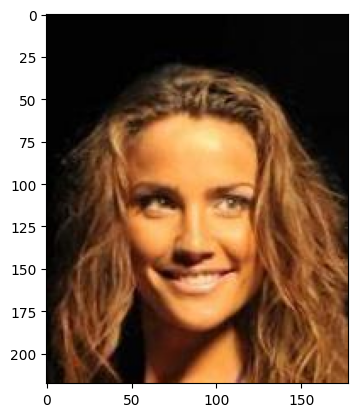

In [ ]:
i = plt.imread(f"data/celeba/img_align_celeba/146136.jpg")

print('image shape: ', i.shape)
print('array type: ', type(i))
print('data type: ', type(i[0][0][0])) #unit8: unsigned integer, 2^0 to 2^8, [0, 255]
print('values: ', i[:2])

plt.imshow(i)

In [ ]:
def get_file_names(data_folder):
    # 获取所有图片的保存路径，保存在list中
    if not os.path.isdir(data_folder):
        print(f"{data_folder} does not exist.")

    files = os.listdir(data_folder)
    res = [data_folder + "/" + f for f in files]
    return res

In [ ]:
image_files = get_file_names(data_folder)
print(f"total number of images: {len(image_files)}")
image_files[:5]

total number of images: 202599


['data/celeba/img_align_celeba/052628.jpg',
 'data/celeba/img_align_celeba/110369.jpg',
 'data/celeba/img_align_celeba/161590.jpg',
 'data/celeba/img_align_celeba/065084.jpg',
 'data/celeba/img_align_celeba/108526.jpg']

## 2. Labels

In [ ]:
columns = ['name', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald',
'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry',
'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee',
'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose',
'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair',
'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
'Wearing_Necklace', 'Wearing_Necktie', 'Young']

In [ ]:
temp = pd.read_csv(label_file, skiprows=2, header=None, names=['data'])
all_label_df = pd.DataFrame(temp['data'].str.split().values.tolist(), columns=columns)
all_label_df.head()

,name,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
label_df = all_label_df[['name', 'Eyeglasses']]
print(f"total number of labels: {len(label_df)}")
label_df.head()
# -1: 没有戴眼镜
# 1: 戴眼镜的

total number of labels: 202599


,name,Eyeglasses
0,000001.jpg,-1
1,000002.jpg,-1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
label_df.groupby('Eyeglasses').count()

,name
Eyeglasses,
-1,189406
1,13193


## 3. PyTorch Dataset

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, image_files, label_df):
        self.image_files = image_files
        self.label_df = label_df

        # 图像的数量和标签的数量必须要相同
        assert(len(self.image_files) == len(self.label_df)), "The number of images IS NOT EQUAL to the number of labels"

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image = plt.imread(self.image_files[idx]) # numpy array
        x = torch.from_numpy(image) # numpy array 转化成 tensor, torch.Size([218, 178, 3])
        x = x / 255.

        image_name = self.image_files[idx].split('/')[-1]
        label = self.label_df[self.label_df['name'] == image_name]['Eyeglasses'].tolist()[0]
        if label == '1':
            y = torch.tensor(1.0)# float转化成 tensor
        else:
            y = torch.tensor(0.0)

        return x, y

image tensor shape: torch.Size([10, 218, 178, 3])
label tensor shape: torch.Size([10])


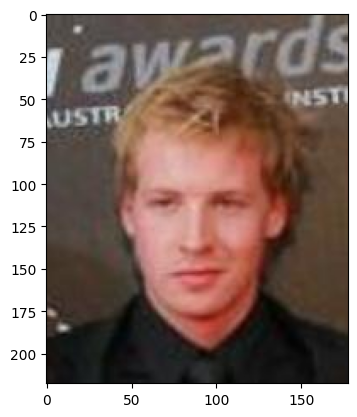

Label: 0.0


In [ ]:
# 取出一个batch

dataset = ImageDataset(image_files=image_files, label_df=label_df)
dl = DataLoader(dataset, batch_size=10)

img, label = next(iter(dl))

print(f"image tensor shape: {img.shape}")
print(f"label tensor shape: {label.shape}")

image = img[8].squeeze()
label = label[8]
plt.imshow(image, cmap="gray")
plt.show()
print(f"Label: {label}")

## 4. Build a simple model

In [ ]:
class M1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(5, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(672, 64)
        self.fc2 = nn.Linear(64, 16)
        self.fc3 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

In [ ]:
BATCH_SIZE = 10
LR = 0.003

dataset = ImageDataset(image_files=image_files, label_df=label_df)
dl = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
model = M1()

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=LR)

In [ ]:
for i, data in enumerate(dl):
    x, y = data
    x = x.permute(0, 3, 2, 1) #原始数据的channel是最后一维，但是pytorch需要的channel在第二维，所以要调换位置， https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

    optimizer.zero_grad()

    y_pred = model(x)
    y_pred = y_pred.squeeze()
    train_loss = loss_function(y_pred, y)

    if i%10 == 0:
        print(f"step: {i}, train loss: {train_loss}, x shape: {x.shape}, y shape: {y.shape}")

    train_loss.backward()
    optimizer.step()

    if i>= 100:
        break

step: 0, train loss: 0.631637454032898, x shape: torch.Size([10, 3, 178, 218]), y shape: torch.Size([10])
step: 10, train loss: 0.6389847993850708, x shape: torch.Size([10, 3, 178, 218]), y shape: torch.Size([10])
step: 20, train loss: 0.6484249830245972, x shape: torch.Size([10, 3, 178, 218]), y shape: torch.Size([10])
step: 30, train loss: 0.6269862651824951, x shape: torch.Size([10, 3, 178, 218]), y shape: torch.Size([10])
step: 40, train loss: 0.6017570495605469, x shape: torch.Size([10, 3, 178, 218]), y shape: torch.Size([10])
step: 50, train loss: 0.6136488914489746, x shape: torch.Size([10, 3, 178, 218]), y shape: torch.Size([10])
step: 60, train loss: 0.6306453347206116, x shape: torch.Size([10, 3, 178, 218]), y shape: torch.Size([10])
step: 70, train loss: 0.6284152865409851, x shape: torch.Size([10, 3, 178, 218]), y shape: torch.Size([10])
step: 80, train loss: 0.6228634715080261, x shape: torch.Size([10, 3, 178, 218]), y shape: torch.Size([10])
step: 90, train loss: 0.619473